### geom_parallel_sets

In [2]:
library(tidyverse)
ggplot2::theme_set(theme_bw())
library(ggforce)

In [7]:
data.frame(Titanic) %>% head

,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


In [8]:
data.frame(Titanic) %>% gather_set_data(1:4, ) %>% tail

,Class,Sex,Age,Survived,Freq,id,x,y
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<fct>
123,3rd,Male,Adult,Yes,75,27,Survived,Yes
124,Crew,Male,Adult,Yes,192,28,Survived,Yes
125,1st,Female,Adult,Yes,140,29,Survived,Yes
126,2nd,Female,Adult,Yes,80,30,Survived,Yes
127,3rd,Female,Adult,Yes,76,31,Survived,Yes
128,Crew,Female,Adult,Yes,20,32,Survived,Yes


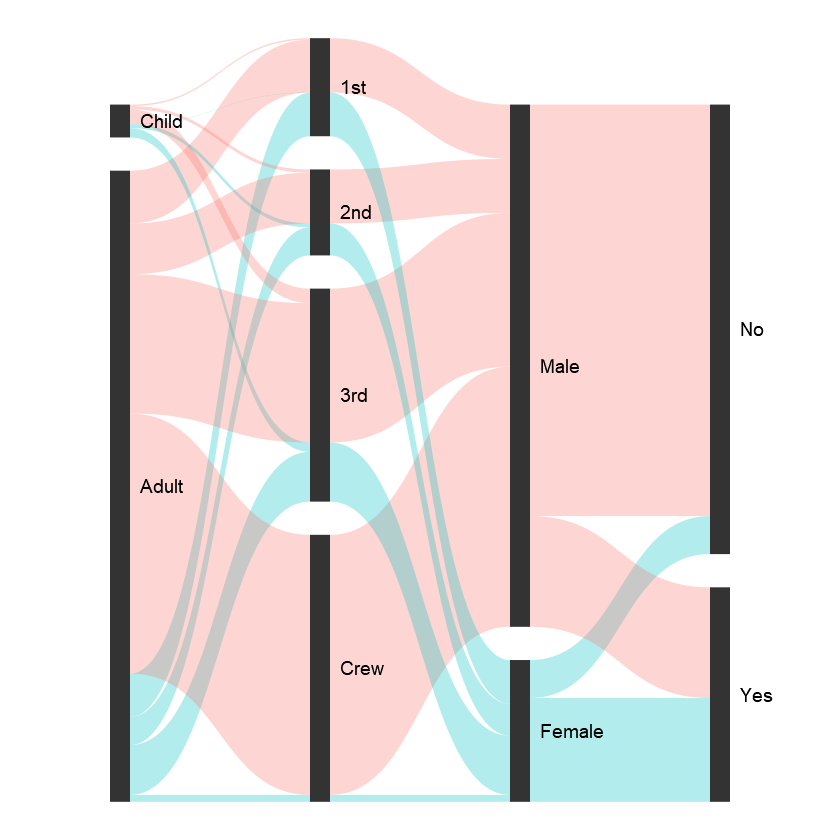

In [9]:
data.frame(Titanic) %>% gather_set_data(1:4) %>%
    ggplot(aes(x, id = id, split = y, value = Freq)) + 
    geom_parallel_sets(aes(fill = Sex), alpha = 0.3, axis.width = 0.1) + 
    geom_parallel_sets_axes(axis.width = 0.1) + 
    geom_parallel_sets_labels(colour = "black", angle = 0, nudge_x = 0.1, hjust = 0) + 
    guides(fill = "none") +  
    theme_void()

# 
# 
# 
# 
### geom_alluvial

In [3]:
library(ggalluvial)

In [18]:
data(vaccinations)
df <- vaccinations
df %>% head(3)
df$response %>% table()

,survey,freq,subject,response,start_date,end_date
,<fct>,<int>,<int>,<fct>,<date>,<date>
1,ms153_NSA,48,1,Always,2010-09-22,2010-10-25
2,ms153_NSA,9,2,Always,2010-09-22,2010-10-25
3,ms153_NSA,66,3,Always,2010-09-22,2010-10-25


.
  Missing     Never Sometimes    Always 
       26        25        37        29 

In [19]:
levels(df$response) <- rev(levels(df$response))
df %>% head(3)
df$response %>% table()

,survey,freq,subject,response,start_date,end_date
,<fct>,<int>,<int>,<fct>,<date>,<date>
1,ms153_NSA,48,1,Missing,2010-09-22,2010-10-25
2,ms153_NSA,9,2,Missing,2010-09-22,2010-10-25
3,ms153_NSA,66,3,Missing,2010-09-22,2010-10-25


.
   Always Sometimes     Never   Missing 
       26        25        37        29 

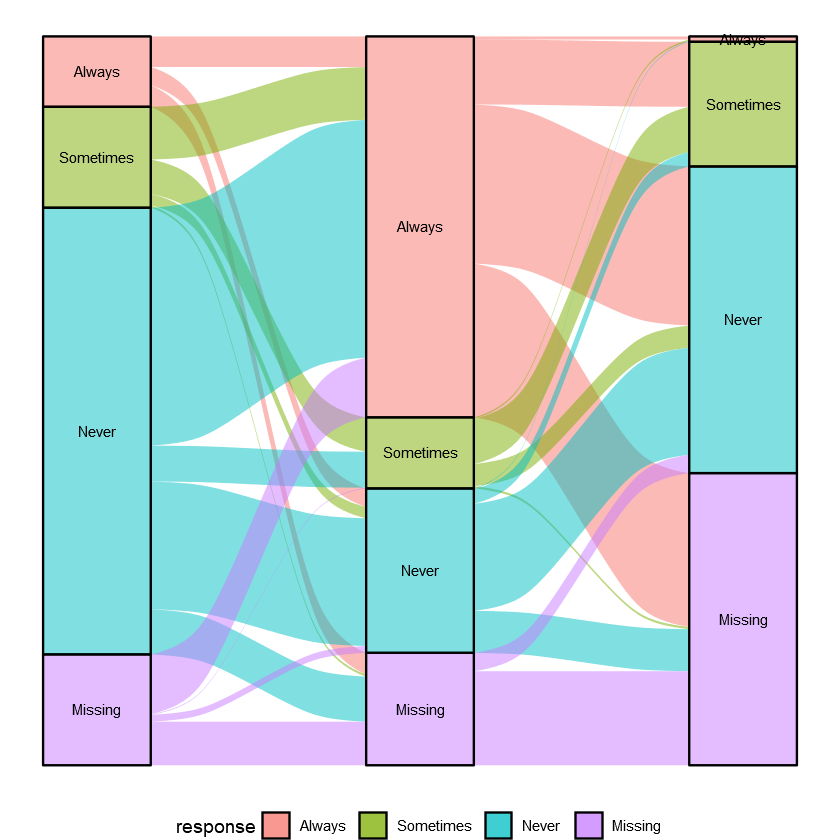

In [23]:
ggplot(df, aes(x = survey, y = freq,
               stratum = response, alluvium = subject,
               fill = response, label = response)) + 
    theme_void() + 
    scale_x_discrete(expand = c(.1, .1)) + 
    geom_flow() + geom_stratum(alpha = .5) + 
    geom_text(stat = "stratum", size = 3) + 
    theme(legend.position = "bottom") 

In [29]:
df1 <- df %>%
    group_by(survey) %>%
    mutate(pct = freq / sum(freq))
df1 %>% tail(3)
df1 %>% dim

survey,freq,subject,response,start_date,end_date,pct
<fct>,<int>,<int>,<fct>,<date>,<date>,<dbl>
ms460_NSA,1,37,Always,2016-09-27,2016-10-25,0.001049318
ms460_NSA,15,38,Sometimes,2016-09-27,2016-10-25,0.015739769
ms460_NSA,113,39,Never,2016-09-27,2016-10-25,0.118572928


[1] 117   7

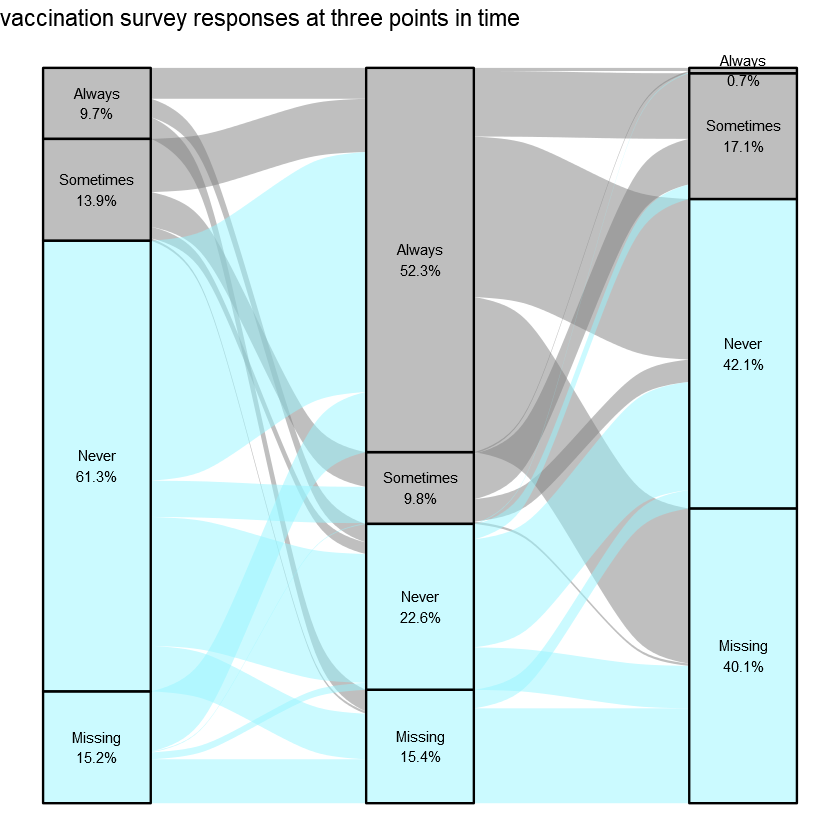

In [27]:
ggplot(df1,
       aes(x = survey, y = pct, 
           stratum = response, alluvium = subject,
           fill = response %in% c("Missing", "Never"), 
           label = response)) +
    theme_void() + 
    scale_x_discrete(expand = c(.1, .1)) +
    scale_y_continuous(label = scales::percent_format()) +
    scale_fill_manual(values = c(`TRUE` = "cadetblue1", `FALSE` = "grey50")) +
    geom_flow() +
    geom_stratum(alpha = .5) +
    geom_text(aes(label = paste0(..stratum.., "\n", scales::percent(..count.., accuracy = .1))), 
              stat = "stratum", size = 3) +
    theme(legend.position = "none") +
    ggtitle("vaccination survey responses at three points in time")

# 
# 
# 
# 

In [30]:
library(nycflights13)

In [102]:
flights %>% group_by(dest) %>% 
    summarise(freq = n()) %>%
    mutate(pct = freq / sum(freq),
           start = "NYC",
           transfer = ifelse(str_detect(dest, "A"), "A", "B"),
           dest = ifelse(transfer == "A", 
                         sample(c("a", "b"), sum(flights2$transfer == "A"), replace = TRUE), 
                         sample(c("c", "d"), sum(flights2$transfer == "B"), replace = TRUE))) %>%
    select(start, transfer, dest, freq, pct) -> flights2
flights2 %>% head(3)

start,transfer,dest,freq,pct
<chr>,<chr>,<chr>,<int>,<dbl>
NYC,A,a,254,0.0007542105
NYC,A,a,265,0.0007868732
NYC,A,b,439,0.0013035371


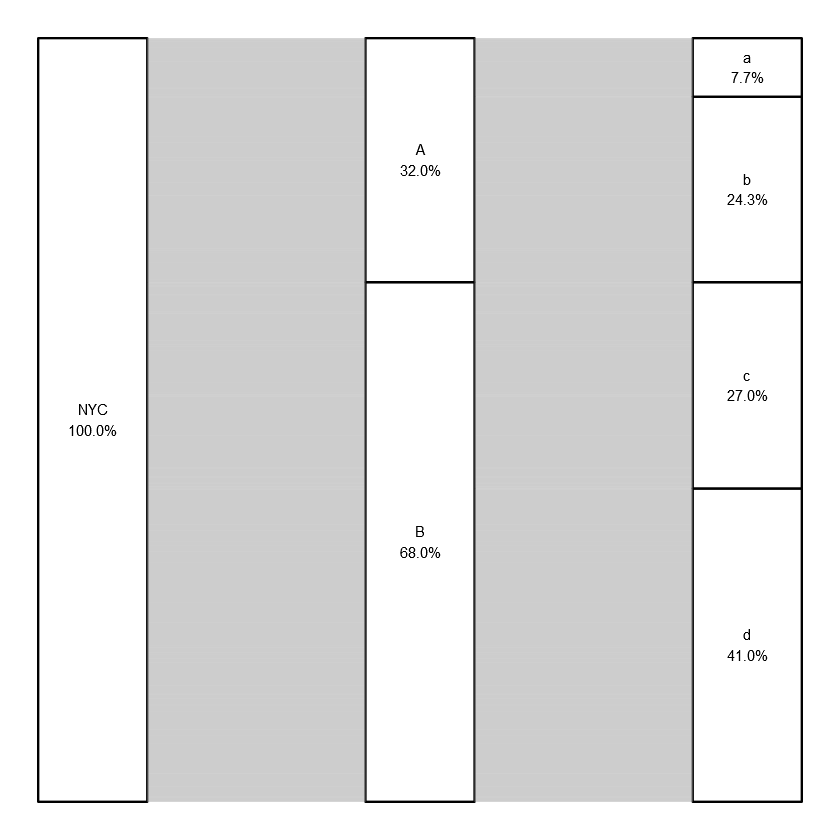

In [108]:
ggplot(flights2, aes(y = pct, axis1 = start, axis2 = transfer, axis3 = dest)) + 
    theme_void() + 
    geom_alluvium() +
    geom_stratum() + 
    geom_flow() + 
    geom_text(aes(label = paste0(..stratum.., "\n", scales::percent(..count.., accuracy = .1))), 
              stat = "stratum", size = 3)